# 4.0 EDA - Exploratory Data Analysis

Objetivos
1. Ganhar experiência de Negócio
2. Validar hipóteses de Negócio (Insights)
    - Surpresa, novas informações
    - Refutação de crenças estabelecidas
3. Perceber quais variáveis serão relevantes para o modelo.

In [1]:
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from IPython.core.display import HTML

warnings.filterwarnings( 'ignore' )

In [11]:
# def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
    
#     plt.style.use( 'bmh' )
#     plt.rcParams['figure.figsize'] = [25, 12]
#     plt.rcParams['font.size'] = 24
    
#     display( HTML( '<style>.container { width:100% !important; }</style>') )
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.set_option( 'display.expand_frame_repr', False )
    
#     sns.set()

In [2]:
%matplotlib inline
%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24

Populating the interactive namespace from numpy and matplotlib


In [13]:
# jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
df4 = pd.read_pickle('df3.pkl')
num_attributes = pd.read_pickle('num_attributes.pkl')
cat_attributes = pd.read_pickle('cat_attributes.pkl')

## 4.1 Análise Univariada

### 4.1.1 Target (Class)
final output you are trying to predict

<AxesSubplot:xlabel='sales', ylabel='Density'>

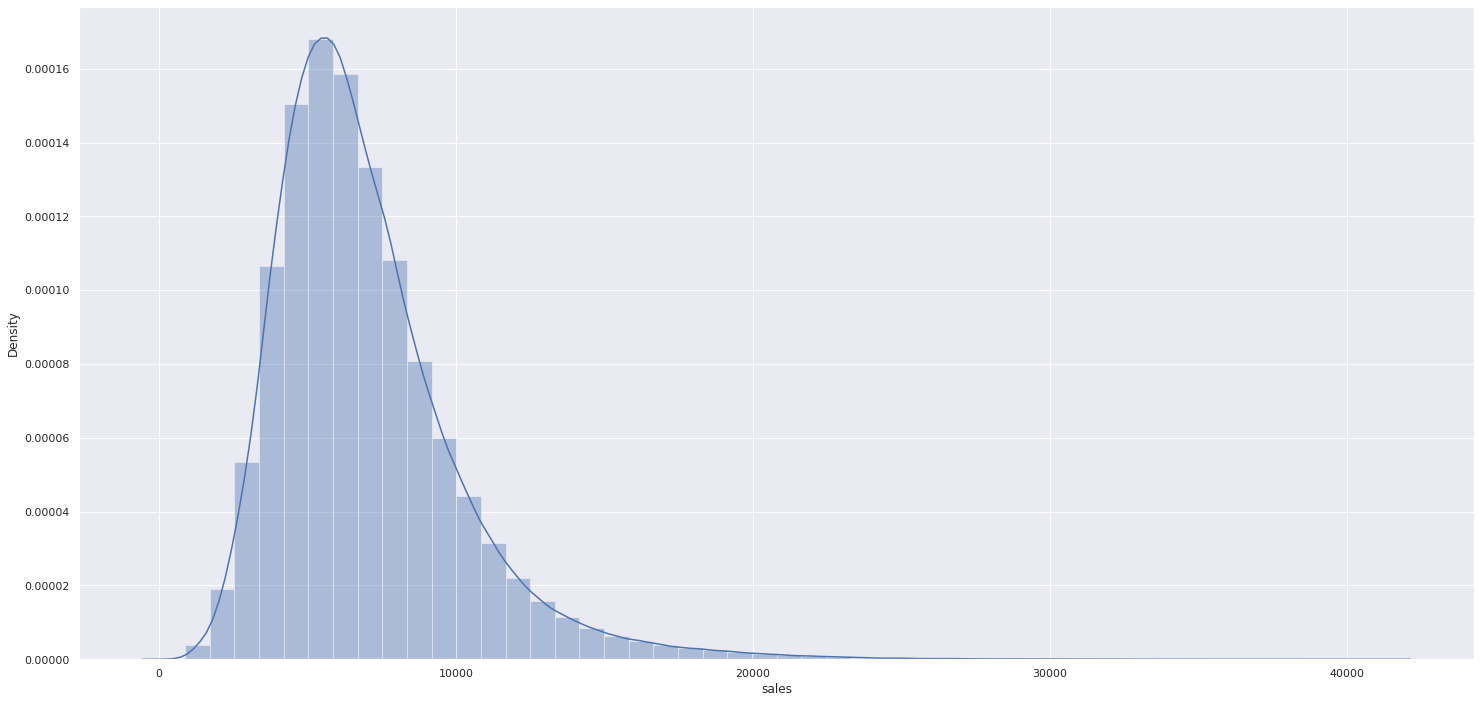

In [5]:
sns.distplot( df4['sales'] )

Algumas das premissas dos modelos de ML é de que os dados sejam:
* Independentes
* Normalmente Distribuidos

Então, como observamos aqui um deslocamento à esquerda dessa distribuição, temos que seria ideal aplicar alguma transformação para deixar a distribuição mais próxima da distribuição normal. Exemplos de transformações são logarítmica ou exponencial.

### 4.1.2 Number Variable

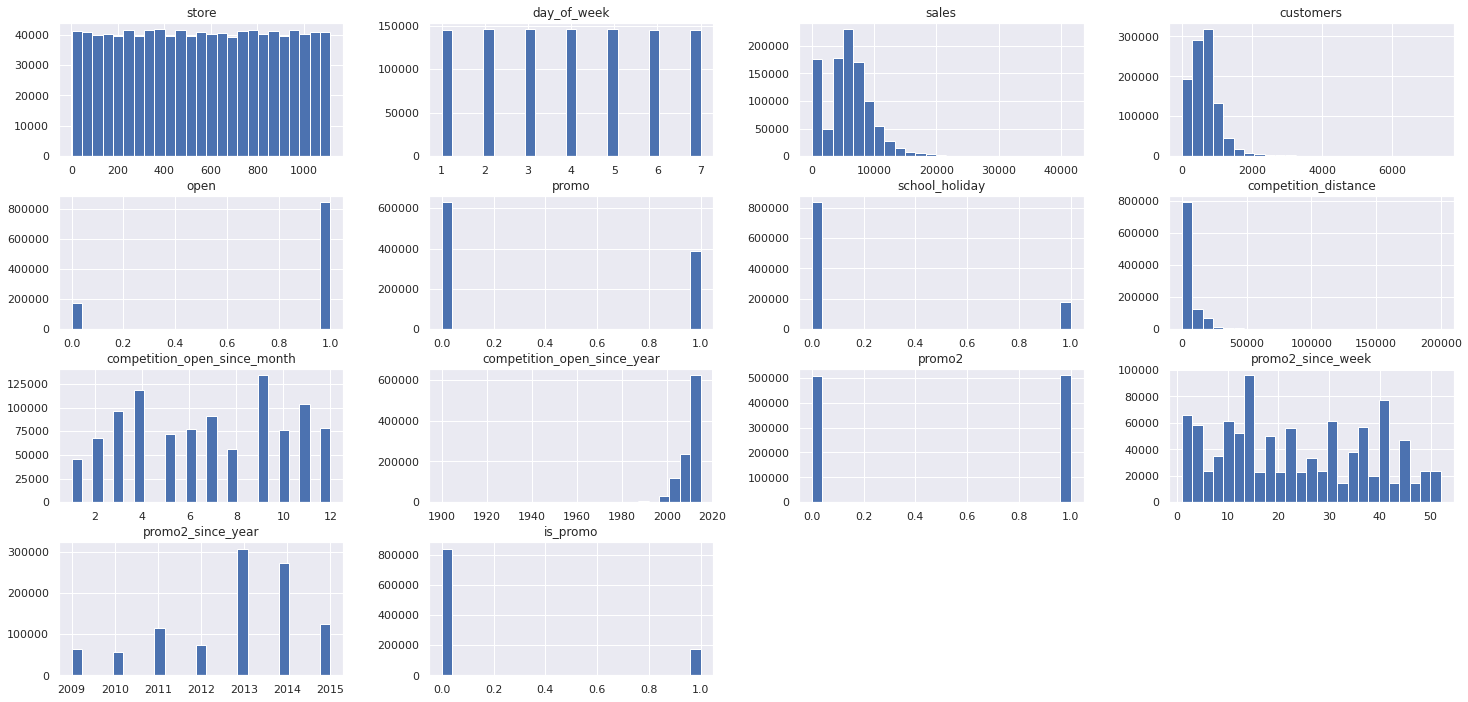

In [6]:
num_attributes.hist( bins= 25 );

### 4.1.3 Category Variable

In [7]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [8]:
df4[ 'state_holiday' ].drop_duplicates()

0            regular_day
63559     public_holiday
129424    easter_holiday
241126         christmas
Name: state_holiday, dtype: object

In [9]:
df4[ 'store_type' ].drop_duplicates()

0     c
1     a
12    d
84    b
Name: store_type, dtype: object

In [10]:
df4[ 'assortment' ].drop_duplicates()

0         basic
3      extended
258       extra
Name: assortment, dtype: object

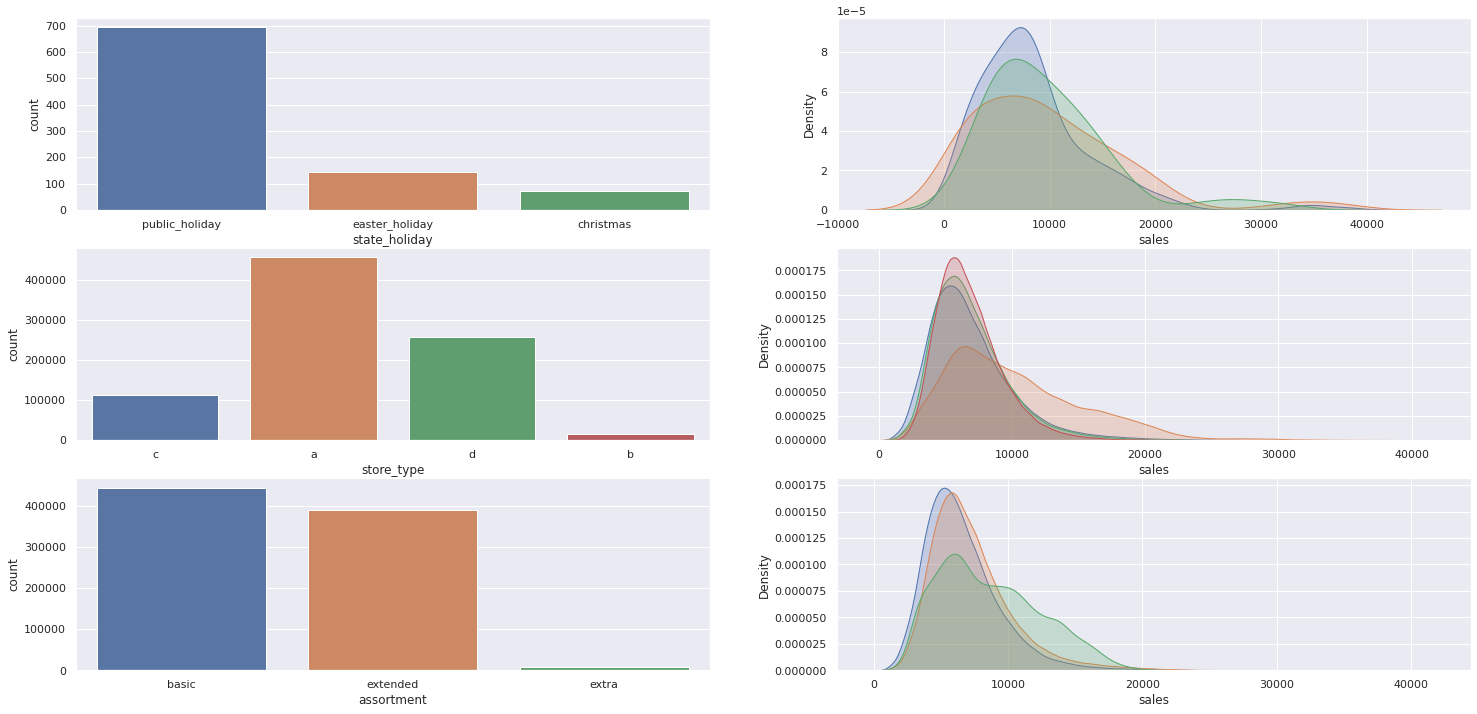

In [11]:
# state_holiday
# preciso filtrar o dias normais pois eles são em muito maior quantidade
a = df4[df4['state_holiday'] != 'regular_day']

# criando um grid matplotlib
plt.subplot( 3, 2, 1 )
sns.countplot( a[ 'state_holiday' ] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[df4['state_holiday'] == 'public_holiday']['sales'], label='public_holiday', shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'easter_holiday']['sales'], label='easter_holiday', shade = True )
sns.kdeplot( df4[df4['state_holiday'] == 'christmas']['sales'], label='christmas', shade = True );

# store_type
# criando um grid matplotlib
plt.subplot( 3, 2, 3 )
sns.countplot( df4[ 'store_type' ] )

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[df4['store_type'] == 'a']['sales'], label='a', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'b']['sales'], label='b', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'c']['sales'], label='c', shade = True )
sns.kdeplot( df4[df4['store_type'] == 'd']['sales'], label='d', shade = True );

# assortment
# criando um grid matplotlib
plt.subplot( 3, 2, 5 )
sns.countplot( df4[ 'assortment' ] )

plt.subplot( 3, 2, 6 )
sns.kdeplot( df4[df4['assortment'] == 'basic']['sales'], label='basic', shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extended']['sales'], label='extended', shade = True )
sns.kdeplot( df4[df4['assortment'] == 'extra']['sales'], label='extra', shade = True );

## 4.2 Análise Bivariada

### H1. Lojas com maior sortimento deveriam vender mais
***FALSA** Lojas com MAIOR SORTIMENTO vendem MENOS

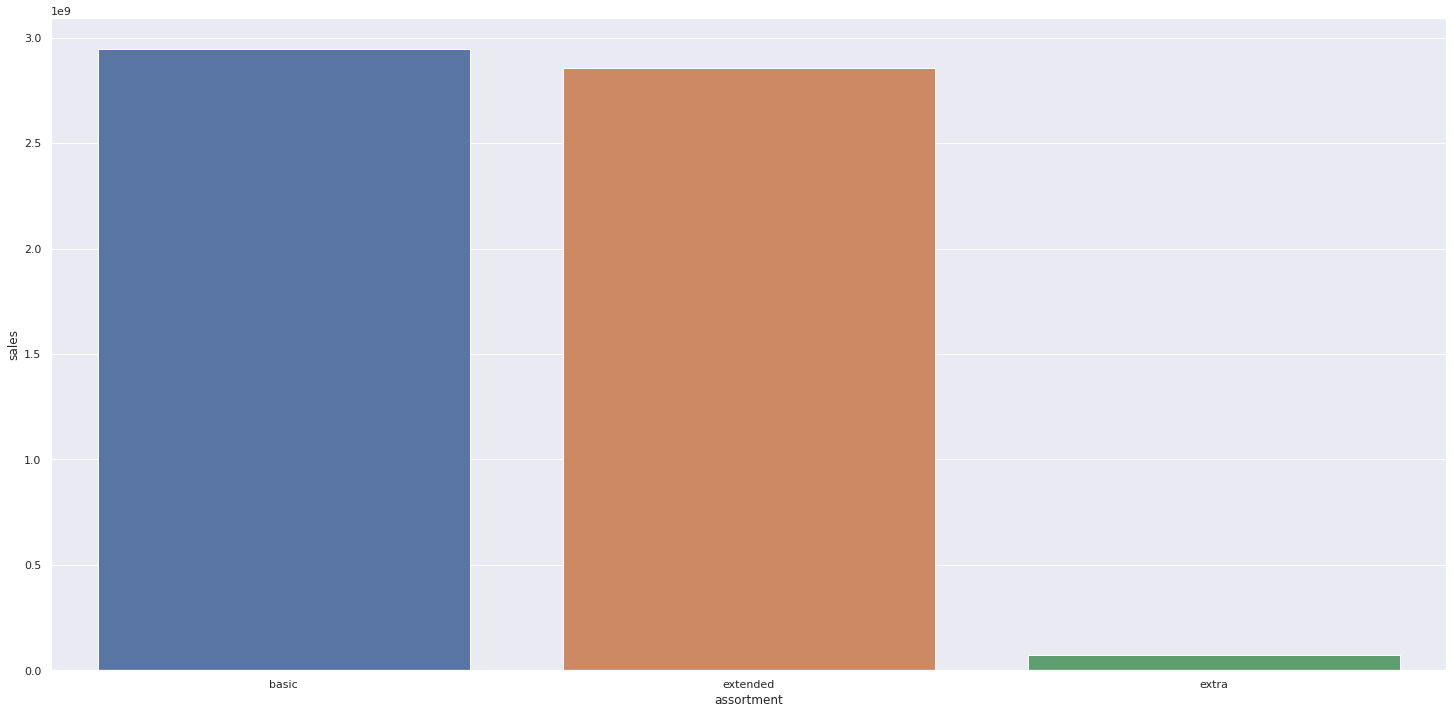

In [12]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x='assortment', y='sales', data=aux1 );

In [13]:
aux2 = df4[['year_week', 'assortment', 'sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
aux2.head()

,year_week,assortment,sales
0,2013-00,basic,13434262
1,2013-00,extended,12425669
2,2013-00,extra,269404
3,2013-01,basic,26007250
4,2013-01,extended,22917693


In [14]:
aux3 = aux2.pivot( index='year_week', columns='assortment', values='sales' )
aux3.head()

assortment,basic,extended,extra
year_week,,,
2013-00,13434262,12425669,269404
2013-01,26007250,22917693,350279
2013-02,17970974,16029584,377207
2013-03,24392076,21243431,404662
2013-04,19972891,18130077,363061


<AxesSubplot:xlabel='year_week'>

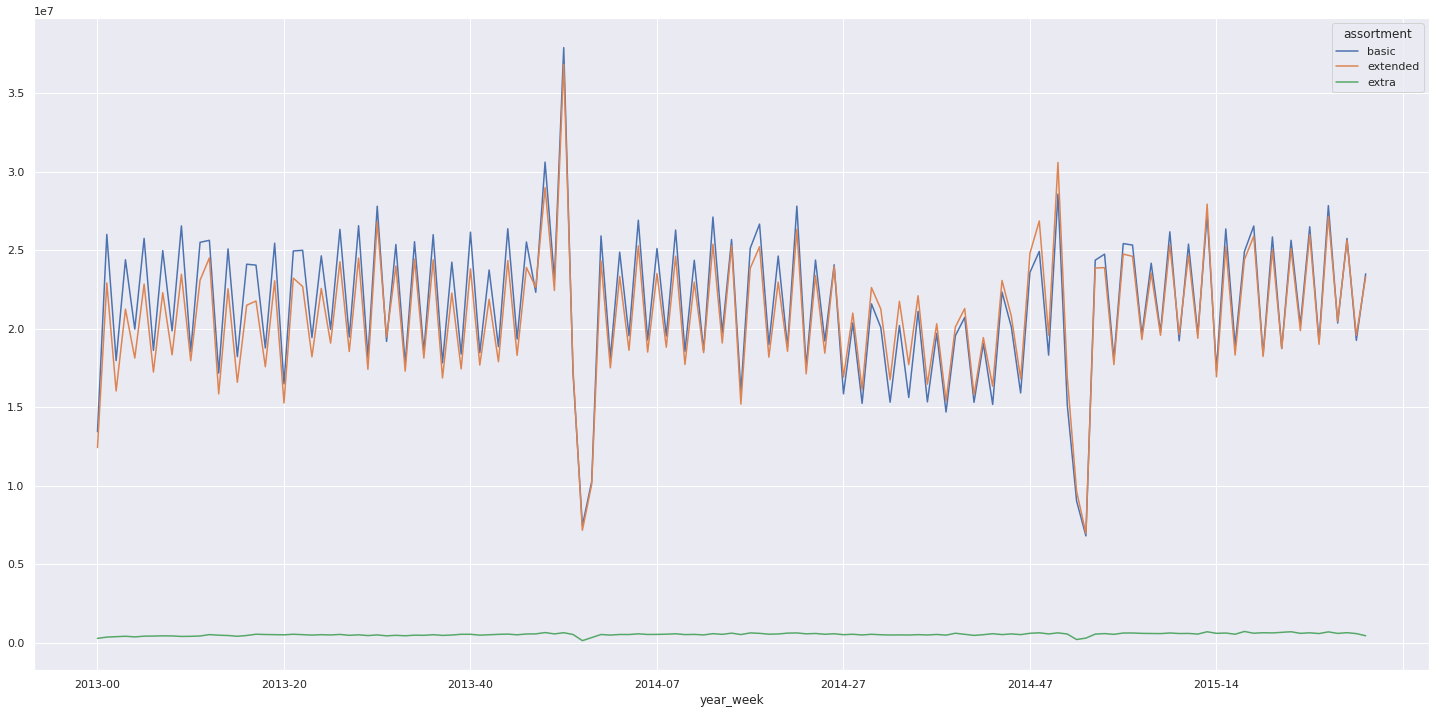

In [15]:
aux3.plot()

<AxesSubplot:xlabel='year_week'>

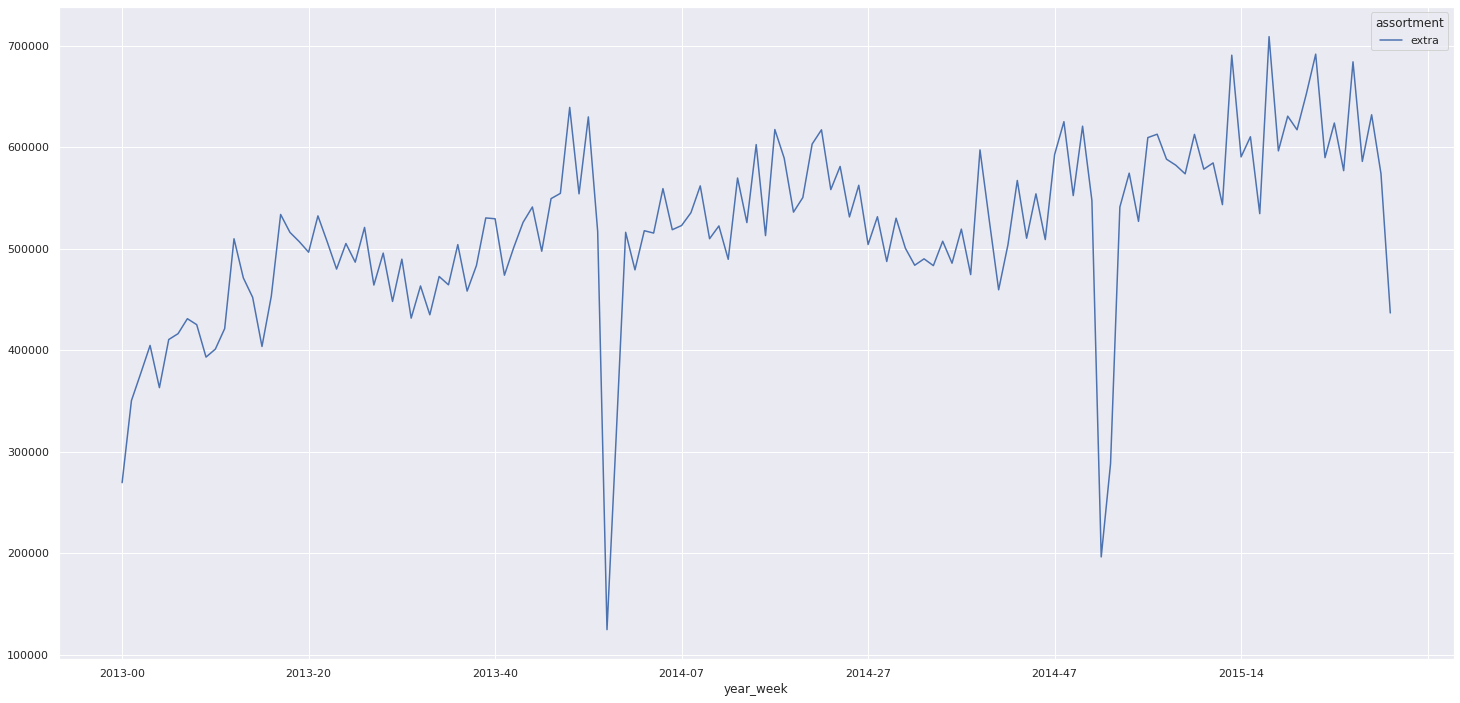

In [16]:
# plotando só o extra separadamente para entender o comportamento e verificar se a escala das outras duas categorias não
# distorceu o comportamento desta
aux4 = aux2[aux2['assortment'] == 'extra']
aux4 = aux4.pivot( index='year_week', columns='assortment', values='sales' )
aux4.plot()

### H2. Lojas com competidores mais próximos deveriam vender menos
***FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS

In [17]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

# criando bins para diminuir a granularidade do gráfico
bins = list(np.arange(0,20000,1000))
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux1.sample(4)

,competition_distance,sales,competition_distance_binned
336,4700.0,6484095,"(4000.0, 5000.0]"
607,21770.0,4667332,NaN
632,29070.0,6784716,NaN
455,8740.0,5430658,"(8000.0, 9000.0]"


In [18]:
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()

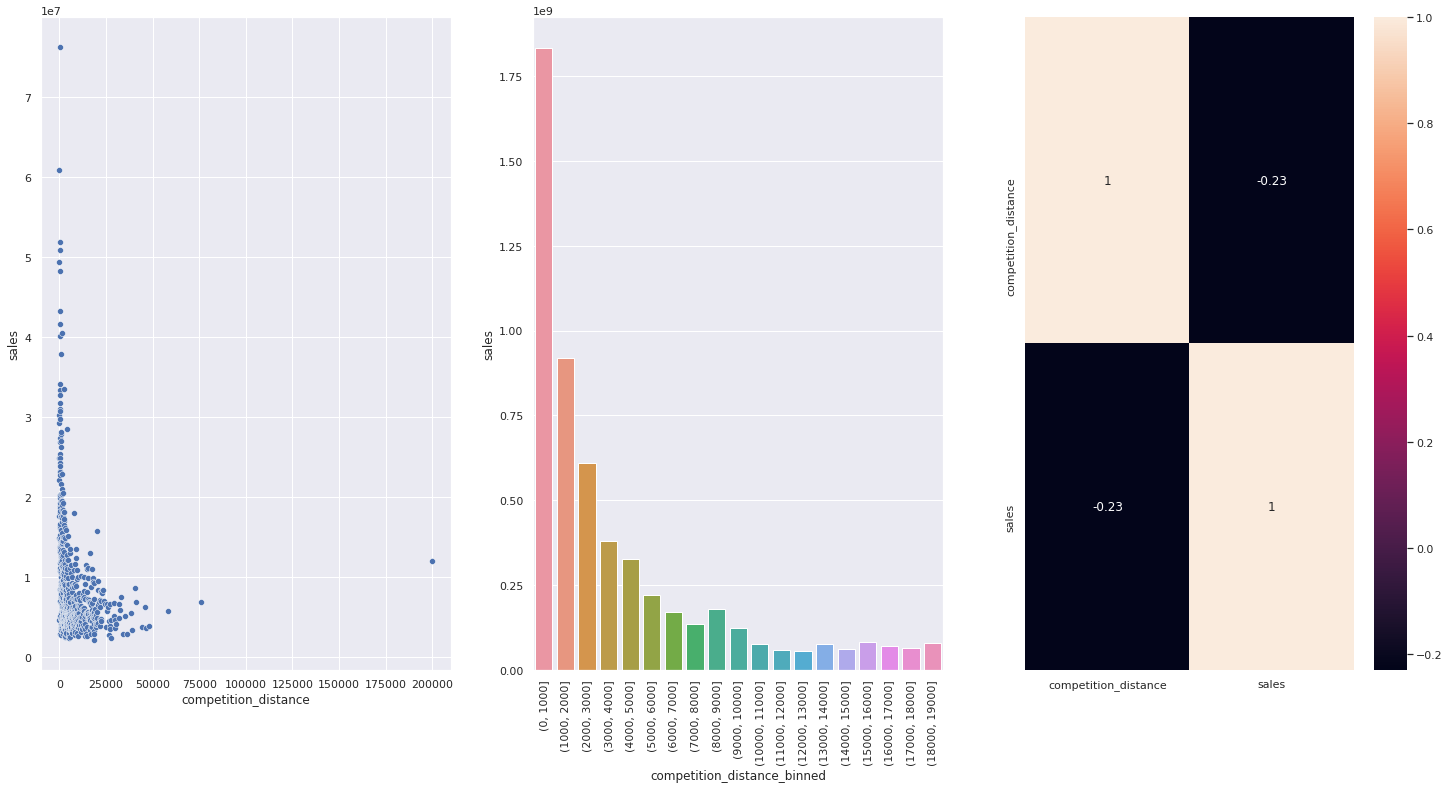

In [19]:
plt.subplot( 1,3,1 )
# para dados muito granulares, o scatterplot também é bastante útil
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.scatterplot( x='competition_distance', y='sales', data=aux1 );

plt.subplot( 1,3,2 )
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 )

plt.subplot( 1,3,3 )
# gráfico que mede a correlação entre as variáveis envolvidas
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H3. Lojas com competidores a mais tempo deveriam vender mais
***FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS

<AxesSubplot:xlabel='competition_open_since_month', ylabel='sales'>

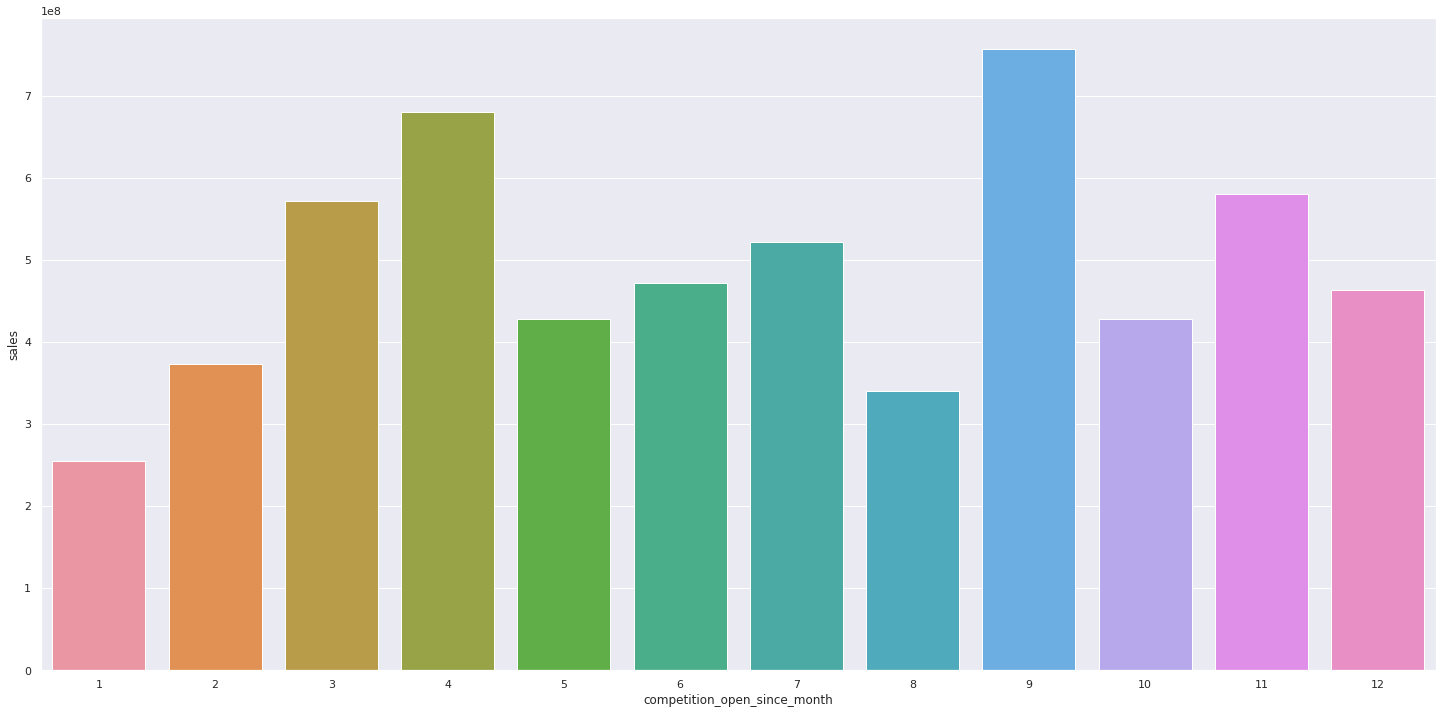

In [20]:
aux1 = df4[['competition_open_since_month','sales']].groupby( 'competition_open_since_month' ).sum().reset_index()
sns.barplot( x='competition_open_since_month', y='sales', data=aux1 )

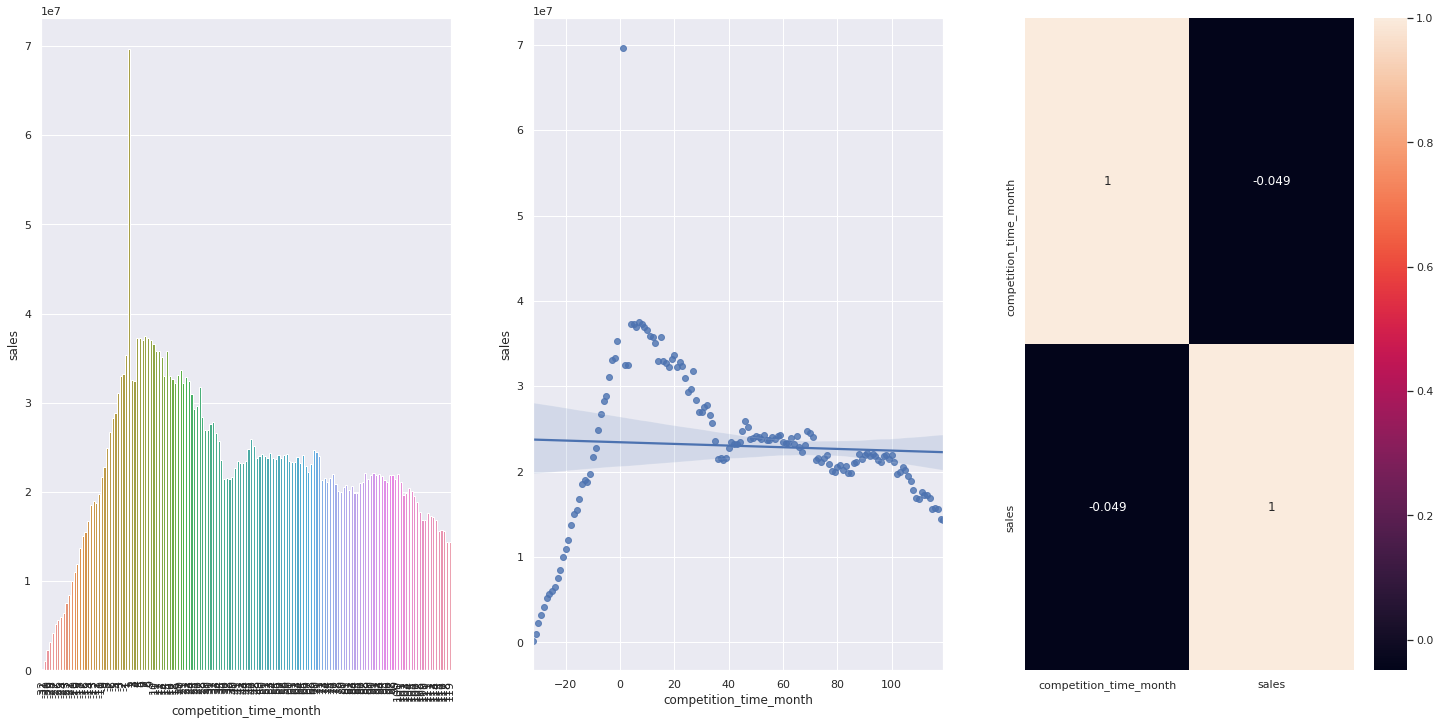

In [21]:
plt.subplot( 1,3,1 )
aux1 = df4[['competition_time_month','sales']].groupby( 'competition_time_month' ).sum().reset_index()
# fazendo um filtro para diminuir a granularidade do dados
aux2 = aux1[(aux1['competition_time_month'] < 120) & (aux1['competition_time_month'] != 0)]
sns.barplot( x='competition_time_month', y='sales', data=aux2 )
plt.xticks( rotation=90 );

plt.subplot( 1,3,2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1,3,3 )
sns.heatmap( aux2.corr( method='pearson' ), annot=True );

### **H4.** Lojas com promoções ativas por mais tempo deveriam vender mais.
***FALSA** Lojas com CPROMOÇÕES ATIVAS POR MAIS TEMPO, depois de um certo período vendem MENOS

In [22]:
df4.head()

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


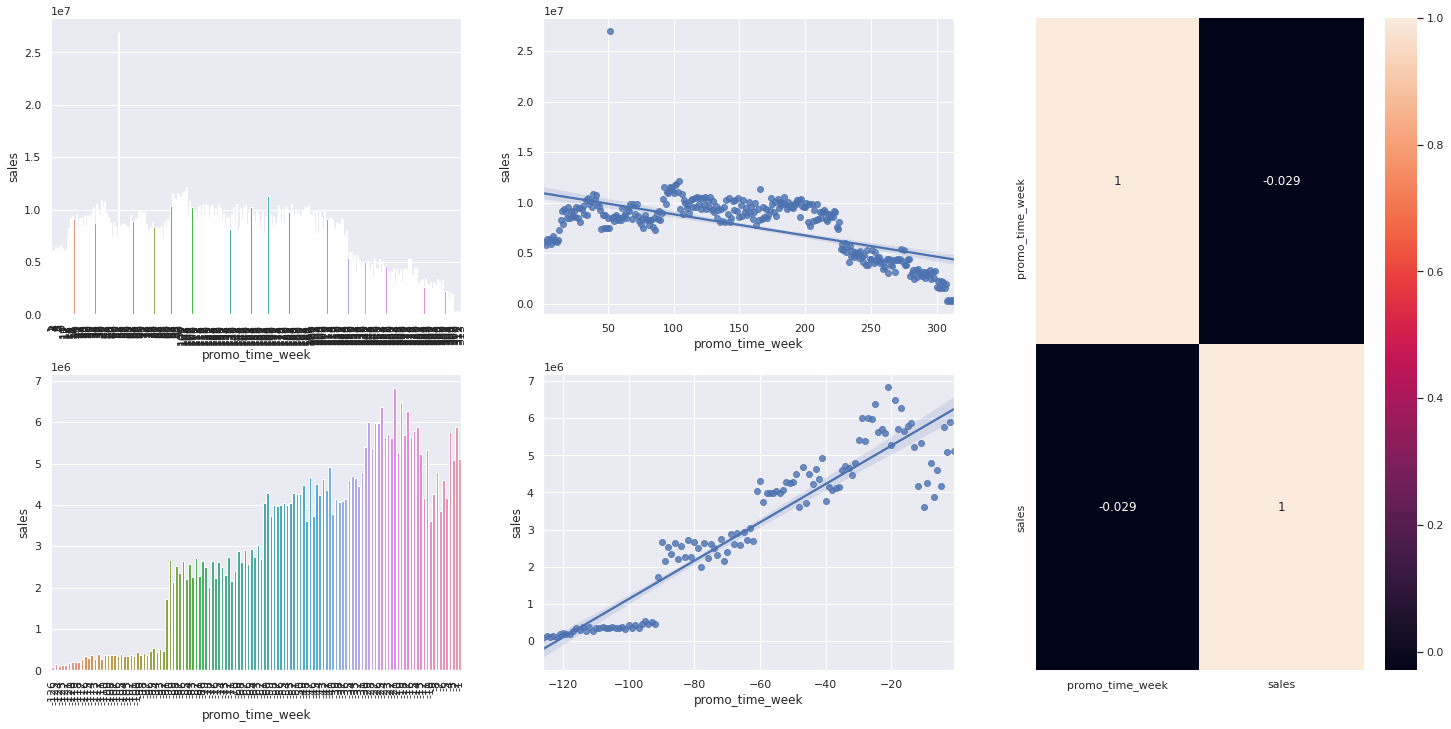

In [23]:
# dimensão de cada linha é uma venda
# hipóteses sobre as dimensões dos dados, pois não sabemos ao certo a documentação dos dados
# existe o período tradicional de promoção ('promo')
# e o período extendido ('promo2')
# a data exata em que começa o período extendido, 'promo_time_week' é usada para calcular o 'promo2_since_*'
# data venda - data início promo2 = 'promo2_since_week' e 'promo2_since_year'
# promo_time_week negativo, significa que foi no período tradicional,  
# se for positivo, está no período extendido, pois a data da venda é posterior ao início do período extendido

aux1 = df4[['promo_time_week','sales']].groupby( 'promo_time_week' ).sum().reset_index()

grid = GridSpec( 2,3 )

plt.subplot( grid[0,0])
aux2 = aux1[aux1['promo_time_week'] > 0] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux2 );

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( grid[1,1] )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### <s>**H5.** Lojas com mais dias de promoção deveriam vender mais.</s>

demandaria mais uma passada de engenharia de uma feature para poder validar essa hipótese. Vamos deixar para o próximo ciclo do CRISP-DS.
Além disso ela é muito similar à hipótese anterior.

### **H7.** Lojas com mais promoções consecutivas deveriam vender mais.
***FALSA** Lojas com MAIS PROMOÇOES CONSECUTIVAS, vendem MENOS.

In [24]:
# 'promo' indica se a loja está no período tradicional promoção.
# 'promo2' indica se a loja está no período extendido promoção.
df4[['promo','promo2','sales']].groupby( ['promo','promo2'] ).sum().reset_index()

,promo,promo2,sales
0,0,0,1482612096
1,0,1,1289362241
2,1,0,1628930532
3,1,1,1472275754


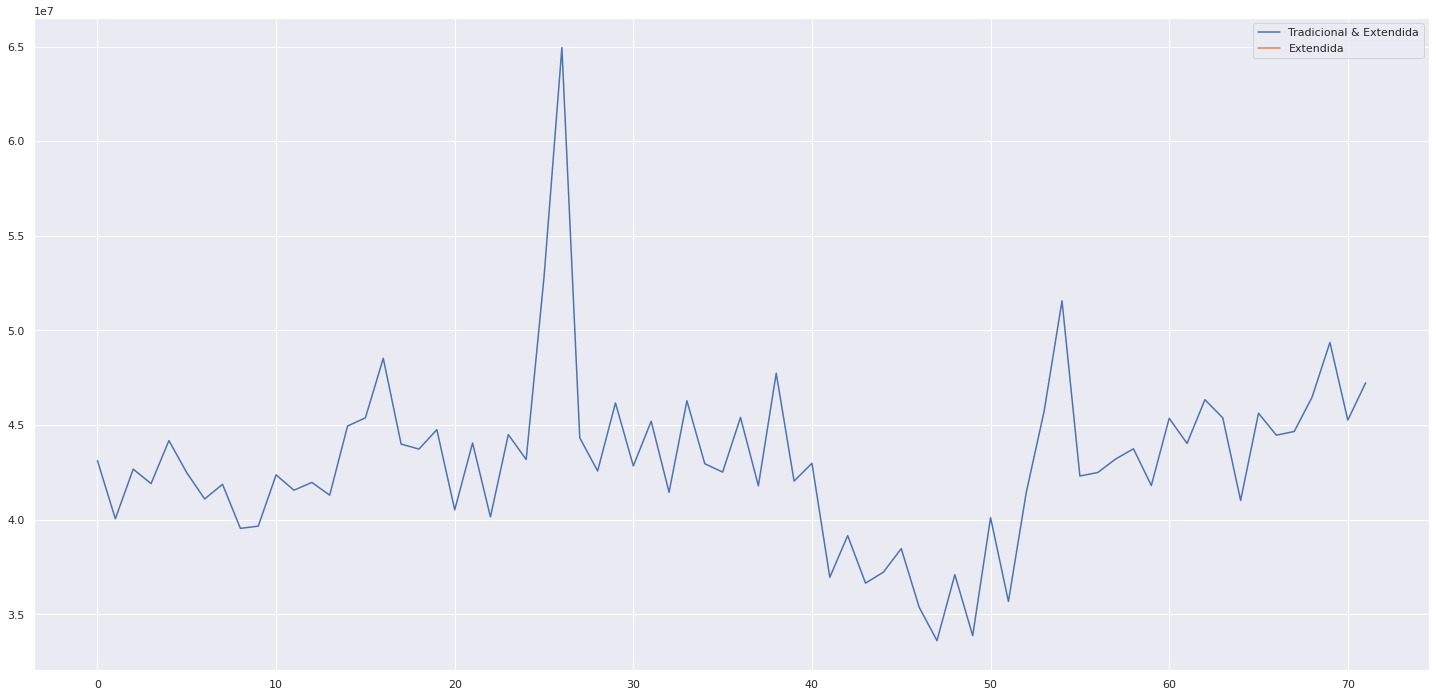

In [25]:
# periodo promo regular e extendido
aux1 = df4[(df4['promo'] == 1) & (df4['promo'] == 1)][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
ax = aux1.plot()

# periodo promo extendido apenas
aux2 = df4[(df4['promo'] == 1) & (df4['promo'] == 0)][['year_week','sales']].groupby( 'year_week' ).sum().reset_index()
aux2.plot(ax=ax)

ax.legend( labels=['Tradicional & Extendida','Extendida'] );

### **H8.** Lojas abertas durante o feriado de Natal deveriam vender mais.
***FALSA** Lojas abertas durante o feriado do Natal, vendem MENOS.

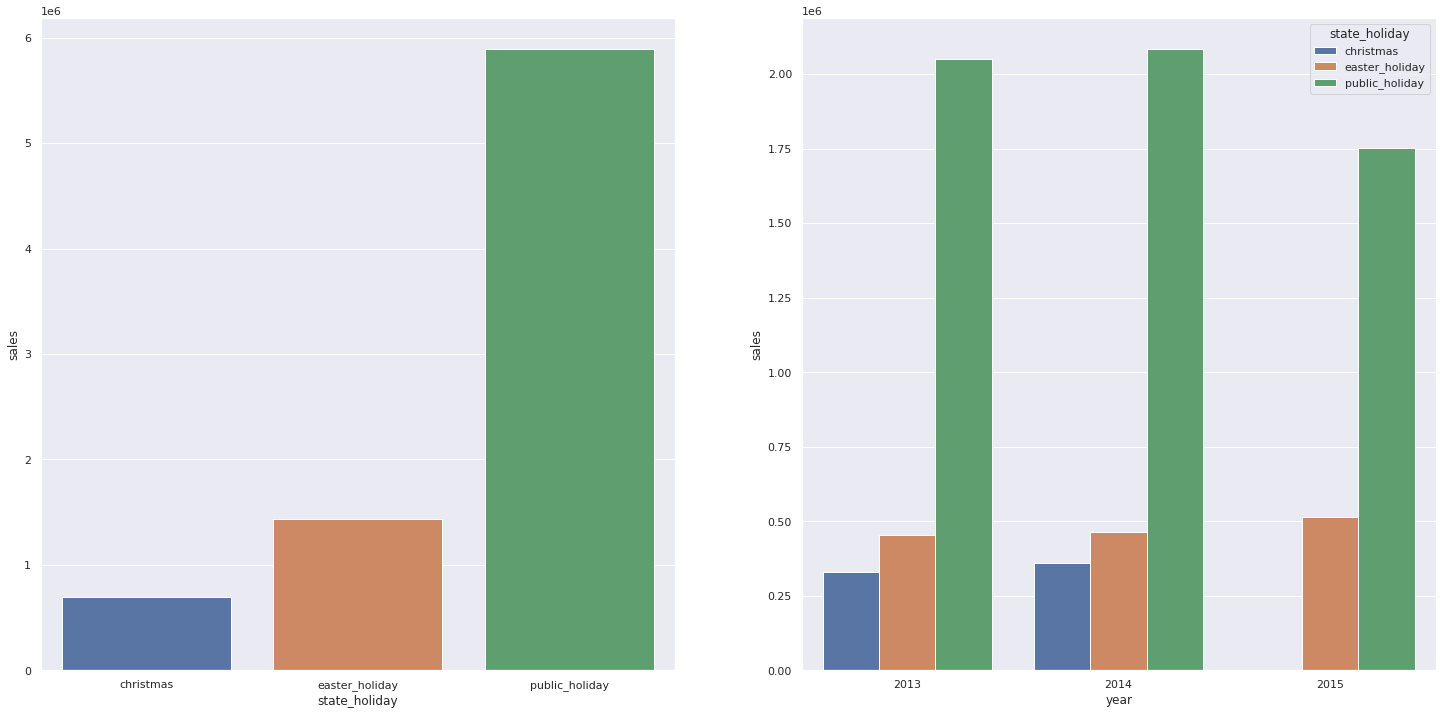

In [26]:
# retirando os dias normais pois eles são muito mais volumosos e vão distorcer a visualização.
aux = df4[df4['state_holiday']!='regular_day']

plt.subplot(1,2,1)
aux1=aux[['state_holiday', 'sales']].groupby('state_holiday').sum().reset_index()
sns.barplot(x='state_holiday',y='sales',data=aux1);

plt.subplot(1,2,2)
aux2=aux[['year','state_holiday','sales']].groupby(['year','state_holiday']).sum().reset_index()
sns.barplot(x='year',y='sales',hue='state_holiday',data=aux2);

### **H9.** Lojas deveriam vender mais ao longo dos anos.
***FALSA** Lojas vendem MENOS ao longo dos anos.

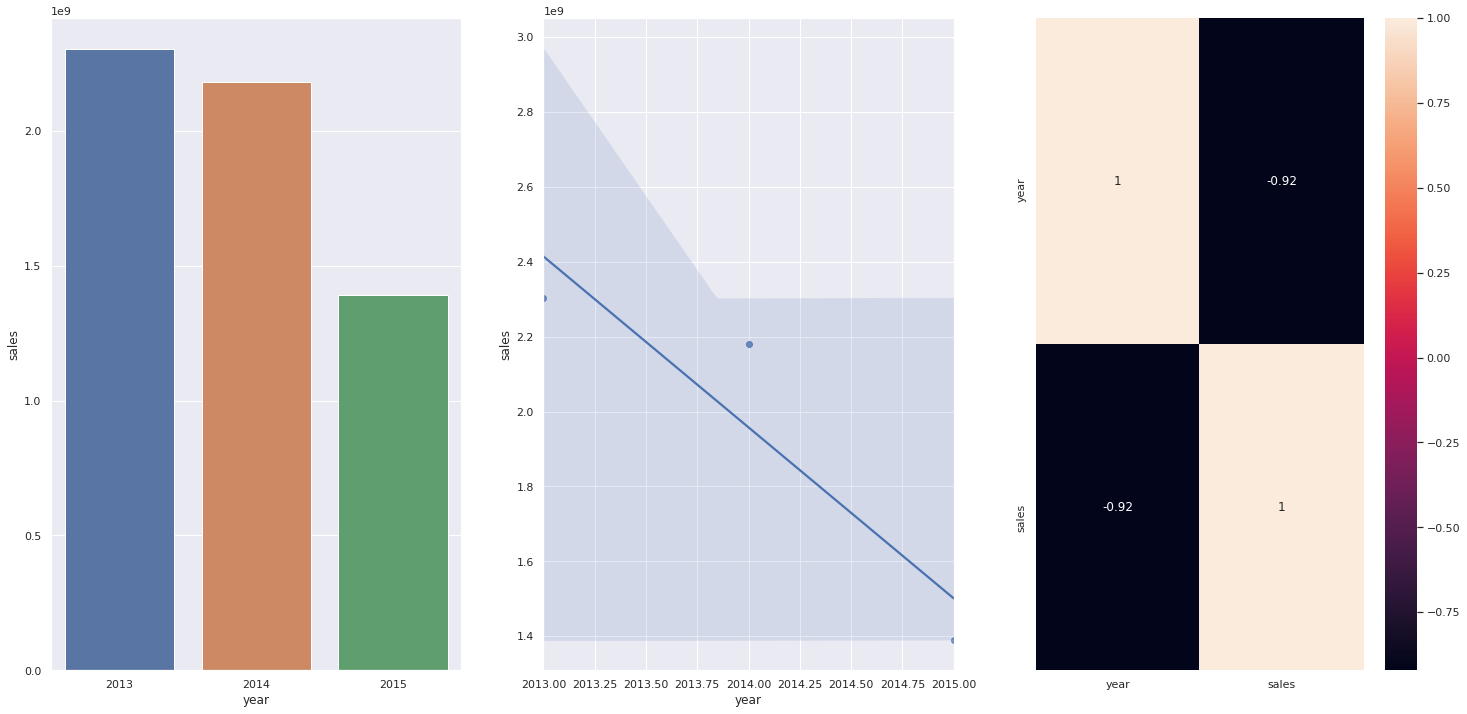

In [27]:
aux1=df4[['year','sales']].groupby('year').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='year',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

Há uma correlação negativa muito forte, indicando que o ano é um atributo importante para o modelo. Porém não é um insight, pois já é algo que possivelmente já é acompanhado corriqueiramente na empresa,

### **H10.** Lojas deveriam vender mais no segundo semestre do ano.
***FALSA** Lojas vendem MENOS no segundo semestre.

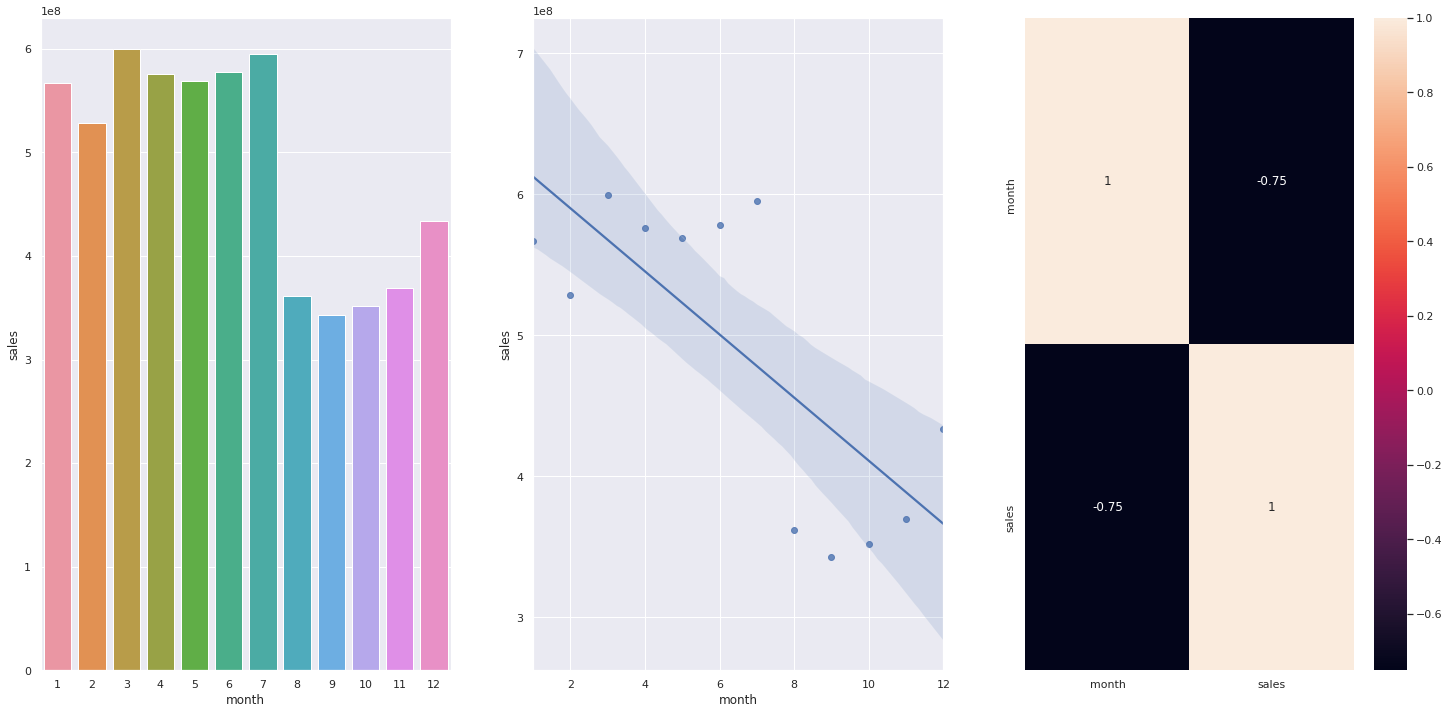

In [28]:
aux1=df4[['month','sales']].groupby('month').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='month',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

### **H11.** Lojas deveriam vender mais depois do dia 10 de cada mês.
***VERDADEIRA** Lojas vendem MAIS depois do dia 10 de cada mês.

In [29]:
aux1=df4[['day','sales']].groupby('day').sum().reset_index()
aux1['before_after']=aux1['day'].apply(lambda x:'before_10days' if x <= 10 else 'after_10days')
aux1.head()

,day,sales,before_after
0,1,155983560,before_10days
1,2,233513169,before_10days
2,3,194582812,before_10days
3,4,228301010,before_10days
4,5,212869176,before_10days


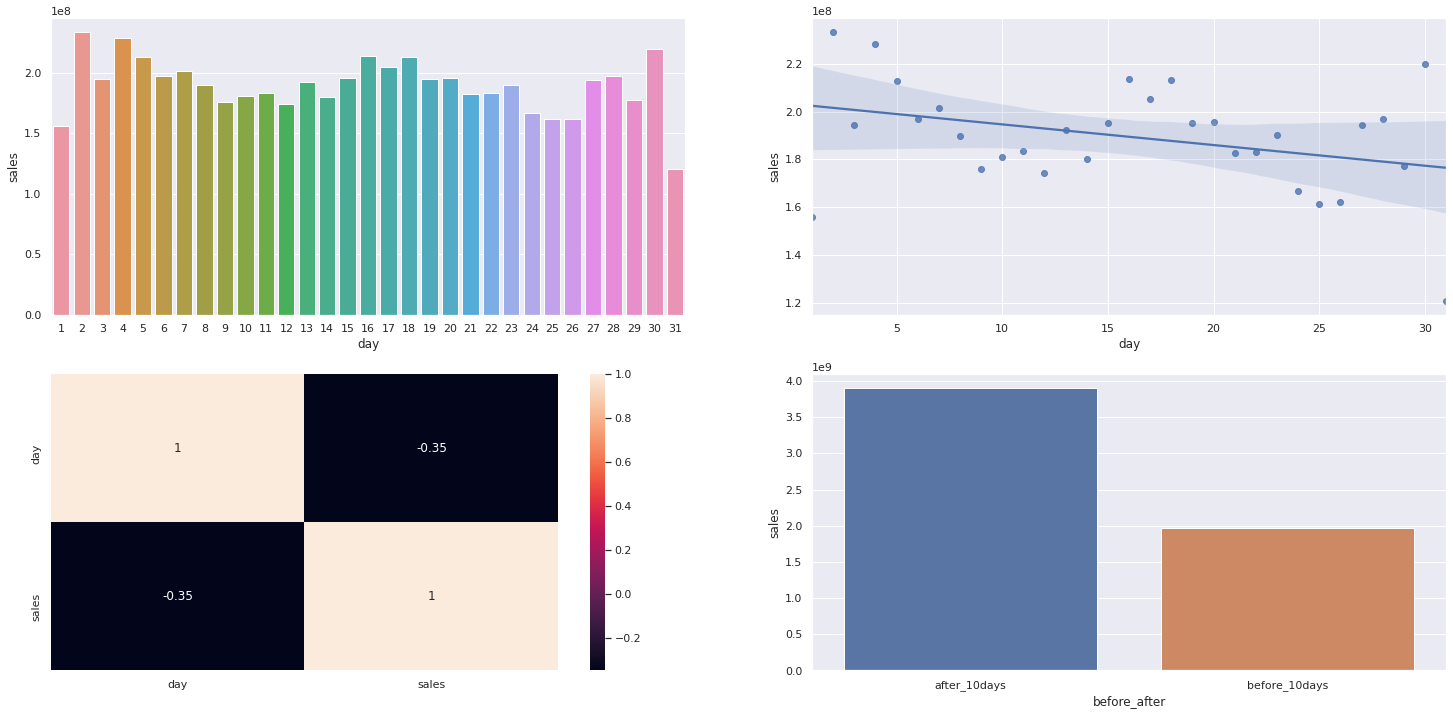

In [30]:
plt.subplot(2,2,1)
sns.barplot(x='day',y='sales',data=aux1);

plt.subplot(2,2,2)
sns.regplot(x='day',y='sales',data=aux1);

plt.subplot(2,2,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

plt.subplot(2,2,4)
aux2=aux1[['before_after','sales']].groupby('before_after').sum().reset_index()
sns.barplot(x='before_after',y='sales',data=aux2);

### **H12.** Lojas deveriam vender menos aos finais de semana.
***VERDADEIRA** Lojas vendem MENOS nos Finais de Semana.

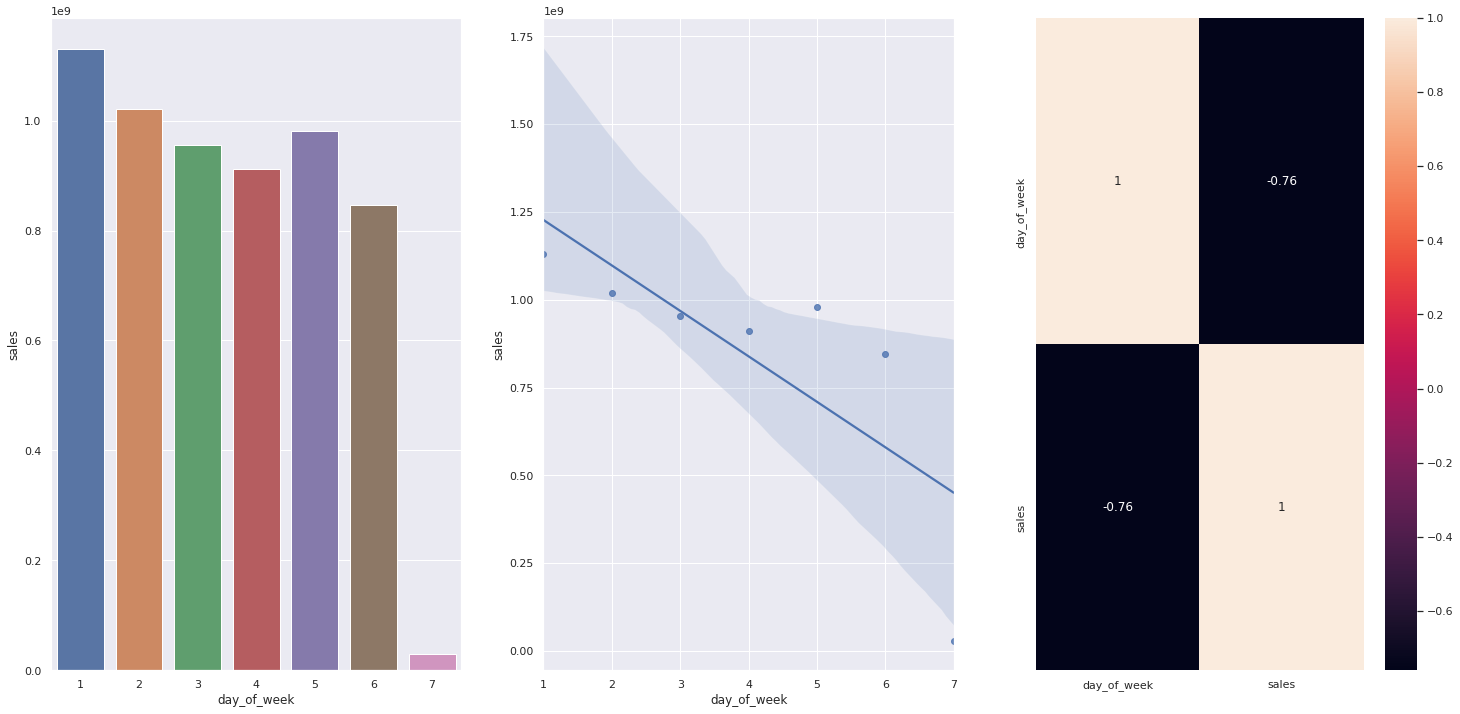

In [31]:
aux1=df4[['day_of_week','sales']].groupby('day_of_week').sum().reset_index()

plt.subplot(1,3,1)
sns.barplot(x='day_of_week',y='sales',data=aux1);

plt.subplot(1,3,2)
sns.regplot(x='day_of_week',y='sales',data=aux1);

plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'),annot=True);

### **H13.** Lojas deveriam vender menos durante os feriados escolares.
***FALSA** Lojas vendem menos durante os feriados escolares, exceto durante os meses de julho e agosto.

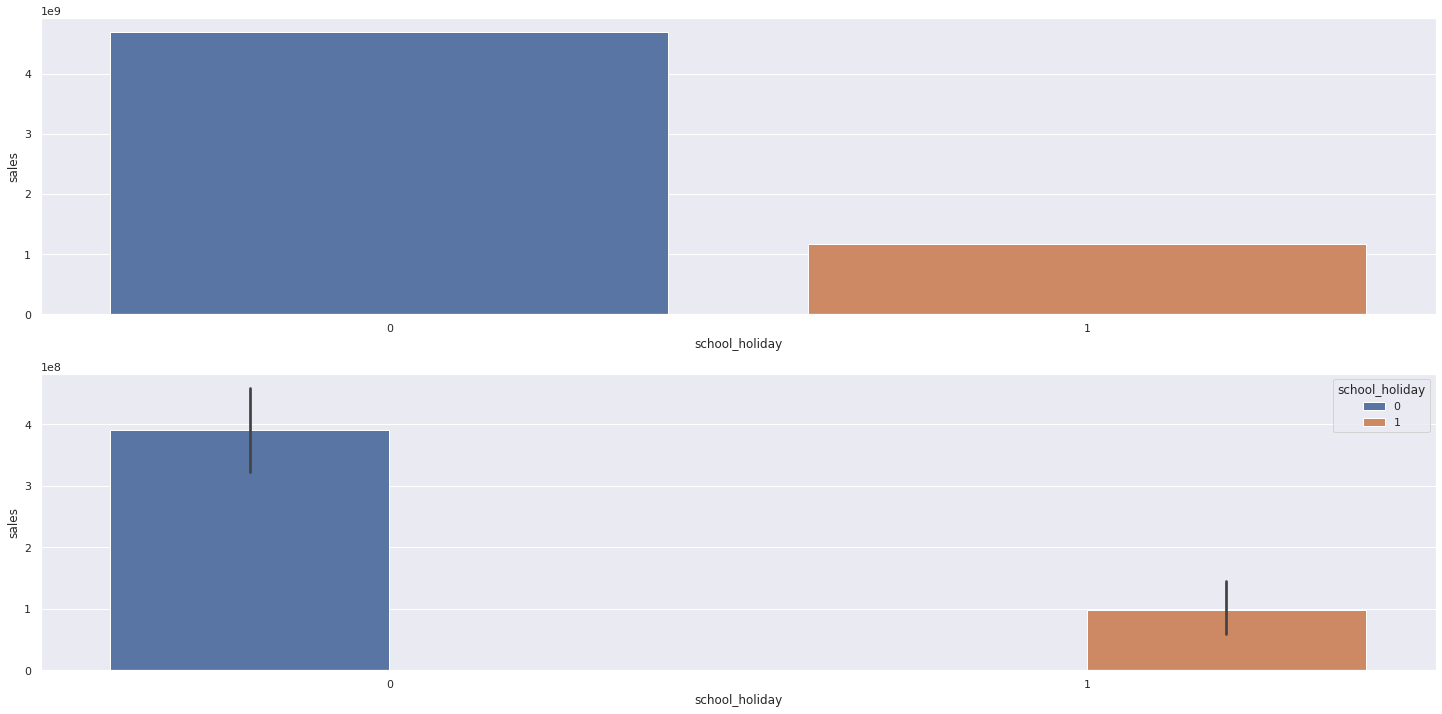

In [32]:
aux1=df4[['school_holiday','sales']].groupby('school_holiday').sum().reset_index()

plt.subplot(2,1,1)
sns.barplot(x='school_holiday',y='sales',data=aux1);

aux2=df4[['month','school_holiday','sales']].groupby(['month','school_holiday']).sum().reset_index()

plt.subplot(2,1,2)
sns.barplot(x='school_holiday',y='sales',hue='school_holiday',data=aux2);

In [3]:
from tabulate import tabulate

In [4]:
tab = [['Hipoteses','Conclusão','Relevância'],
       ['H1','Falsa','Baixa'],
       ['H2','Falsa','Media'],
       ['H3','Falsa','Media'],
       ['H4','Falsa','Baixa'],
       ['H5','-','-'],
       ['H7','Falsa','Baixa'],
       ['H8','Falsa','Media'],
       ['H9','Falsa','Alta'],
       ['H10','Falsa','Alta'],
       ['H11','Verdadeira','Alta'],
       ['H12','Verdadeira','Alta'],
       ['H13','Verdadeira','Baixa'],
      ]
print(tabulate(tab,headers='firstrow'))

Hipoteses    Conclusão    Relevância
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H7           Falsa        Baixa
H8           Falsa        Media
H9           Falsa        Alta
H10          Falsa        Alta
H11          Verdadeira   Alta
H12          Verdadeira   Alta
H13          Verdadeira   Baixa



## 4.3 Análise Multivariada

## 4.3.1 Numerical Attributes

In [9]:
num_attributes.head()

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
0,1,5,5263,555,1,1,1,1270.0,9,2008,0,31,2015,0
1,2,5,6064,625,1,1,1,570.0,11,2007,1,13,2010,1
2,3,5,8314,821,1,1,1,14130.0,12,2006,1,14,2011,1
3,4,5,13995,1498,1,1,1,620.0,9,2009,0,31,2015,0
4,5,5,4822,559,1,1,1,29910.0,4,2015,0,31,2015,0


<AxesSubplot:>

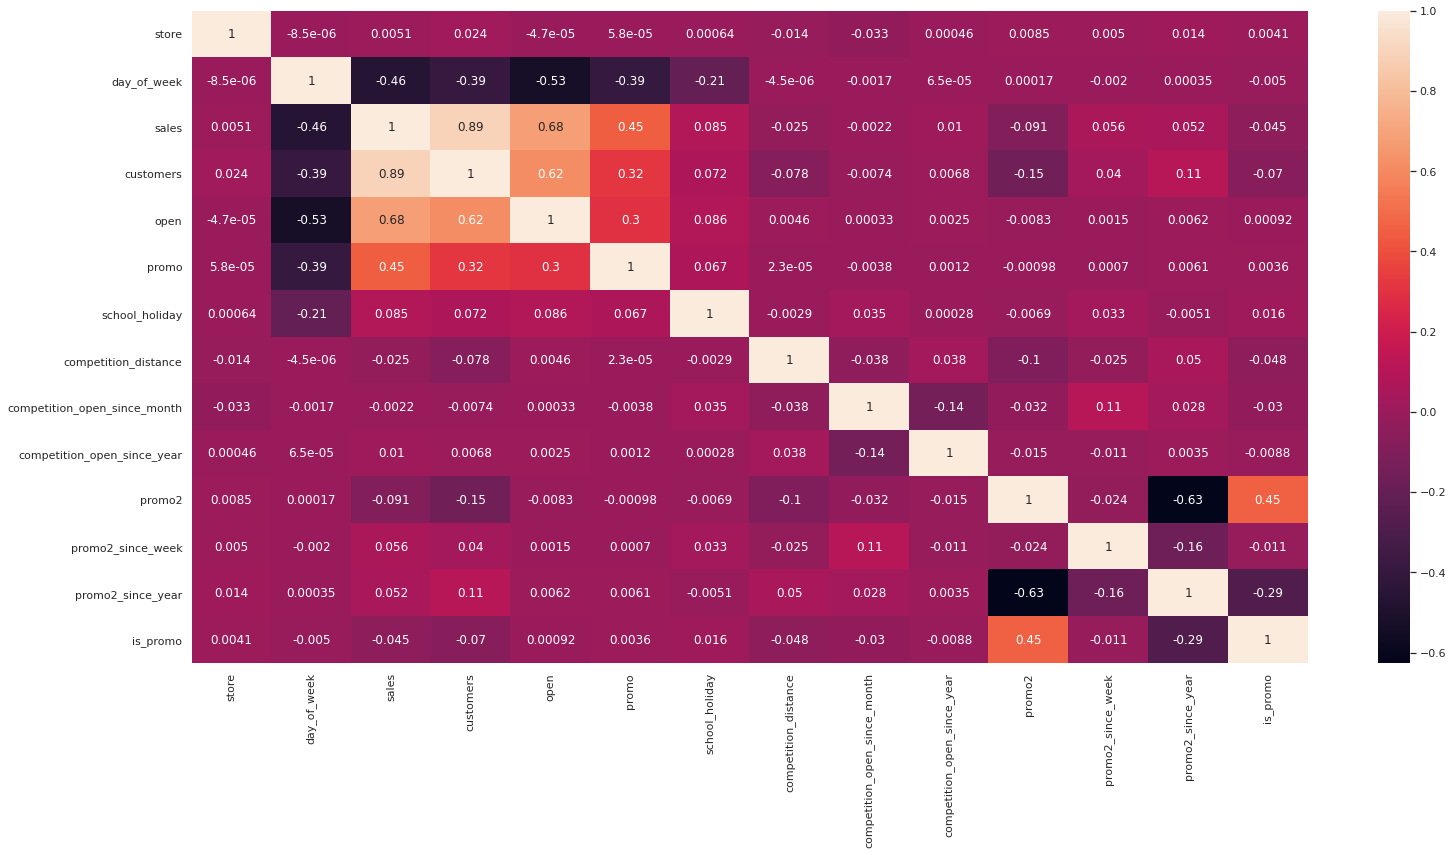

In [14]:
correlation = num_attributes.corr(method='pearson')
sns.heatmap(correlation, annot=True)

## 4.3.2 Categorical Attributes

To calculate de correlation in categorical attributes, we need the Cramer-V function, for this we need to manually implemente the algorithm.

In [4]:
# atualizando os atributos categóricos
a=df4.select_dtypes(include='object')

In [5]:
a.head()

,state_holiday,store_type,assortment,year_week
0,regular_day,c,basic,2015-30
1,regular_day,a,basic,2015-30
2,regular_day,a,basic,2015-30
3,regular_day,c,extended,2015-30
4,regular_day,a,basic,2015-30


In [11]:
from scipy import stats as ss

In [28]:
cm = pd.crosstab(a['state_holiday'],a['store_type']).values

In [29]:
cm

array([[     4,     66,      0,      1],
       [    36,    100,      0,      9],
       [   236,    285,     65,    108],
       [456766,  15109, 112903, 258650]])

In [30]:
chi2=ss.chi2_contingency(cm)

In [31]:
chi2

(12792.159524019908,
 0.0,
 9,
 array([[3.84324548e+01, 1.30843335e+00, 9.49942795e+00, 2.17596839e+01],
        [7.84888161e+01, 2.67215262e+00, 1.94002402e+01, 4.44387911e+01],
        [3.75663713e+02, 1.27894753e+01, 9.28535634e+01, 2.12693248e+02],
        [4.56549415e+05, 1.55432299e+04, 1.12846247e+05, 2.58489108e+05]]))

In [32]:
# let's get just the result of the test
chi2[0]

12792.159524019908

In [33]:
chi2=chi2[0]

In [34]:
# n is the sum of the values
n=cm.sum()

In [35]:
r,k=cm.shape

In [36]:
v=np.sqrt((chi2/n)/(min(k-1,r-1)))

In [37]:
v

0.07106457093267678

In [38]:
# now making it a method for later use
def cramer_v(x,y):
    cm = pd.crosstab(x,y).values
    chi2=ss.chi2_contingency(cm)
    chi2=chi2[0]
    n=cm.sum()
    r,k=cm.shape
    v=np.sqrt((chi2/n)/(min(k-1,r-1)))
    
    return v

In [39]:
cramer_v(a['state_holiday'],a['store_type'])

0.07106457093267678

In [42]:
# before continuing, let's correct the bias in this cramer_v function
# the cramer_v function tends to overestimate the value of the correlations
chi2corr=max(0,chi2-(k-1)*(r-1)/(n-1))
kcorr=k-(k-1)**2/(n-1)
rcorr=r-(r-1)**2/(n-1)

In [43]:
def cramer_vcorr(x,y):
    cm = pd.crosstab(x,y).values
    chi2=ss.chi2_contingency(cm)
    chi2=chi2[0]
    n=cm.sum()
    r,k=cm.shape
    
    chi2corr=max(0,chi2-(k-1)*(r-1)/(n-1))
    kcorr=k-(k-1)**2/(n-1)
    rcorr=r-(r-1)**2/(n-1)
    
    v=np.sqrt((chi2corr/n)/(min(kcorr-1,rcorr-1)))
    
    return v

In [45]:
cramer_vcorr(a['state_holiday'],a['store_type'])

0.07106469715258833

In [47]:
a1=cramer_vcorr(a['state_holiday'],a['state_holiday'])
a2=cramer_vcorr(a['state_holiday'],a['store_type'])
a3=cramer_vcorr(a['state_holiday'],a['assortment'])

a4=cramer_vcorr(a['store_type'],a['state_holiday'])
a5=cramer_vcorr(a['store_type'],a['store_type'])
a6=cramer_vcorr(a['store_type'],a['assortment'])

a7=cramer_vcorr(a['assortment'],a['state_holiday'])
a8=cramer_vcorr(a['assortment'],a['store_type'])
a9=cramer_vcorr(a['assortment'],a['assortment'])

d=pd.DataFrame({'sate_holiday':[a1,a2,a3],
             'store_type': [a4,a5,a6],
             'assortment': [a7,a8,a9]})
d=d.set_index(d.columns)

<AxesSubplot:>

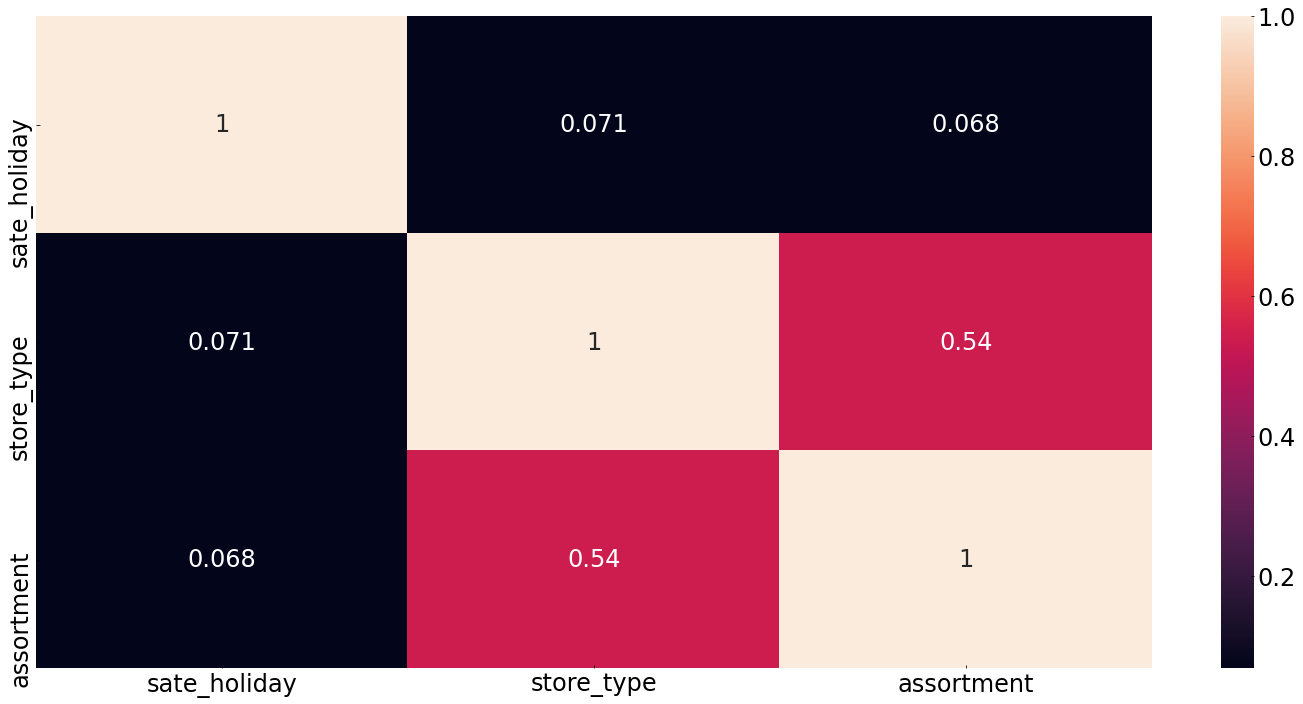

In [48]:
sns.heatmap(d,annot=True)

In [50]:
df4.to_pickle('df4.pkl')
#não houve mudança no dataframe dos atributos numéricos
num_attributes.to_pickle('num_attributes.pkl')
a.to_pickle('cat_attributes2.pkl')